#**Load libraries**

In [ ]:
!pip install --upgrade silabs-mltk
!pip install -U tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 MB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.3/390.3 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 10.3 MB/s eta 0:00:00


In [ ]:
# Basic libraries
import numpy as np
import os, glob, zipfile, random, cv2, shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.image as mpimg
import albumentations as A
from tqdm import tqdm
from collections import Counter

# Imagen basic libraries
import cv2
from scipy import misc

# Deep learning libraries
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from mltk.datasets.image import rock_paper_scissors_v2


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


#**Preparate dataset**

##**Load data**

In [ ]:
dataset_dir = rock_paper_scissors_v2.load_data()

to /root/.mltk/downloads/rock_paper_scissors_v2.7z
(This may take awhile, please be patient ...)
Extracting: /root/.mltk/downloads/rock_paper_scissors_v2.7z
to: /root/.mltk/datasets/rock_paper_scissors/v2
(This may take awhile, please be patient ...)


patool: Extracting /root/.mltk/downloads/rock_paper_scissors_v2.7z ...
patool: running /usr/bin/7z x -y -o/tmp/root/mltk/tmp_archives/rock_paper_scissors_v2 -- /root/.mltk/downloads/rock_paper_scissors_v2.7z
patool: ... /root/.mltk/downloads/rock_paper_scissors_v2.7z extracted to `/tmp/root/mltk/tmp_archives/rock_paper_scissors_v2'.


In [ ]:
print(f'Directory: {dataset_dir}')

Directory: /root/.mltk/datasets/rock_paper_scissors/v2


In [ ]:
!mv /root/.mltk/datasets/rock_paper_scissors/v2 /content

In [ ]:
directory = "/content/v2/"

In [ ]:
for sub_dir in os.listdir(directory):
    if os.path.isdir(f'{directory}/{sub_dir}'):
        print(sub_dir)

paper
rock
_unknown_
scissor


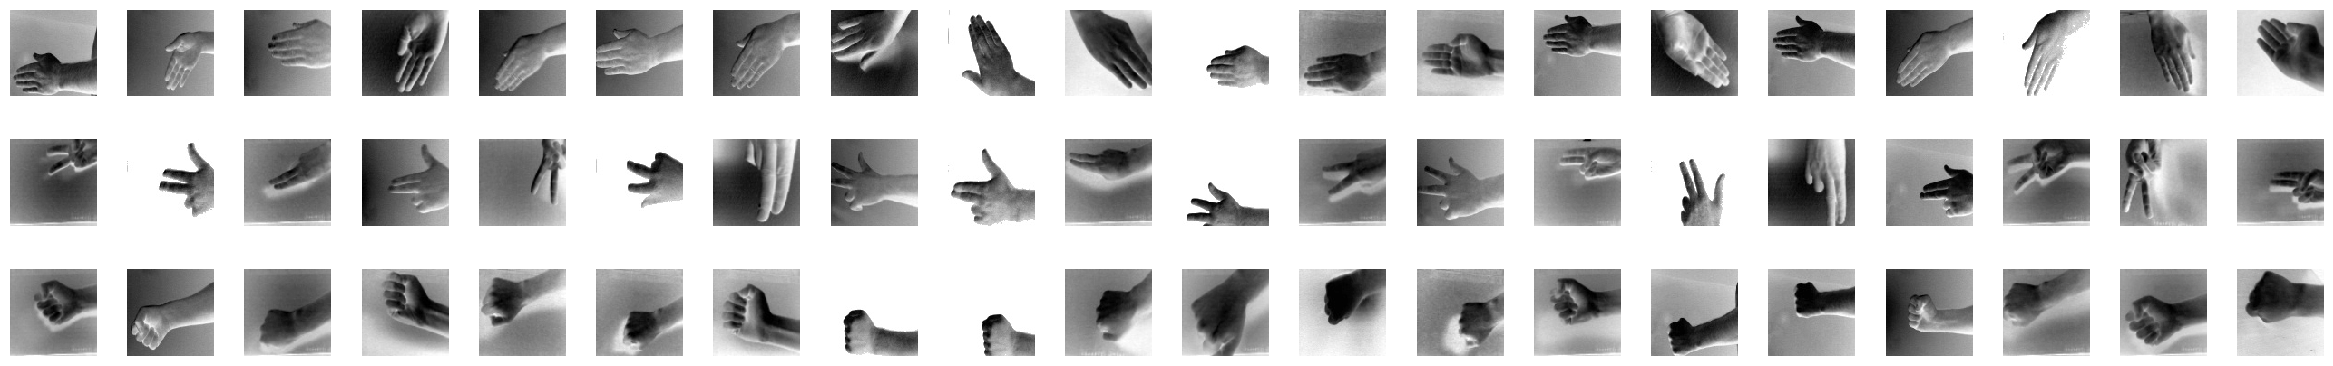

In [ ]:
class_samples = ['paper', 'scissor', 'rock']

n_rows = 3
n_cols = 20
plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col

    img_path = '{dir}/{label}/'.format(dir=directory, label=class_samples[row])

    files = glob.glob(img_path+"*.jpg")
    img = files[random.randint(0,len(files))]

    imagen = mpimg.imread(img)

    # Resized imagen and load
    resized_img = cv2.resize(imagen, (96, 96))

    # Plot imagen
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(resized_img, cmap="binary", interpolation="nearest")
    plt.axis('off')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


##**Train, test and valid data**

In [ ]:
location = os.getcwd()
print(location)

/content


In [ ]:
if not os.path.exists(location+"/data/"):
    os.mkdir(location+"/data/")

if not os.path.exists(location+"/data/train/"):
    os.mkdir(location+"/data/train/")
if not os.path.exists(location+"/data/test/"):
    os.mkdir(location+"/data/test/")
if not os.path.exists(location+"/data/valid/"):
    os.mkdir(location+"/data/valid/")

if not os.path.exists(location+"/data/train/paper"):
    os.mkdir(location+"/data/train/paper")
if not os.path.exists(location+"/data/test/paper"):
    os.mkdir(location+"/data/test/paper")
if not os.path.exists(location+"/data/valid/paper"):
    os.mkdir(location+"/data/valid/paper")

if not os.path.exists(location+"/data/train/rock"):
    os.mkdir(location+"/data/train/rock")
if not os.path.exists(location+"/data/test/rock"):
    os.mkdir(location+"/data/test/rock")
if not os.path.exists(location+"/data/valid/rock"):
    os.mkdir(location+"/data/valid/rock")

if not os.path.exists(location+"/data/train/scissor"):
    os.mkdir(location+"/data/train/scissor")
if not os.path.exists(location+"/data/test/scissor"):
    os.mkdir(location+"/data/test/scissor")
if not os.path.exists(location+"/data/valid/scissor"):
    os.mkdir(location+"/data/valid/scissor")


In [ ]:
paperFiles, rockFiles, scissorFiles = [], [], []

paperFiles   = paperFiles + glob.glob(f"{directory}paper/*.jpg")
rockFiles    = rockFiles + glob.glob(f"{directory}rock/*.jpg")
scissorFiles = scissorFiles + glob.glob(f"{directory}scissor/*.jpg")

len(paperFiles), len(rockFiles), len(scissorFiles)

(1656, 2031, 1865)

In [ ]:
count = 0

for jpg_paper in tqdm(paperFiles, desc='Creating paper data'):
  name = jpg_paper.split('/')[-1][0:-4]
  if count < round(len(paperFiles)*0.70):
    shutil.copy2(f"/content/v2/paper/{name}.jpg", f"/content/data/train/paper/{name}.jpg")
  elif count >= round(len(paperFiles)*0.70) and count < round(len(paperFiles)*0.90):
    shutil.copy2(f"/content/v2/paper/{name}.jpg", f"/content/data/valid/paper/{name}.jpg")
  elif count >= round(len(paperFiles)*0.90):
    shutil.copy2(f"/content/v2/paper/{name}.jpg", f"/content/data/test/paper/{name}.jpg")
  count += 1

for jpg_rock in tqdm(rockFiles, desc='Creating rock data'):
  name = jpg_rock.split('/')[-1][0:-4]
  if count < round(len(rockFiles)*0.70):
    shutil.copy2(f"/content/v2/rock/{name}.jpg", f"/content/data/train/rock/{name}.jpg")
  elif count >= round(len(rockFiles)*0.70) and count < round(len(rockFiles)*0.90):
    shutil.copy2(f"/content/v2/rock/{name}.jpg", f"/content/data/valid/rock/{name}.jpg")
  elif count >= round(len(rockFiles)*0.90):
    shutil.copy2(f"/content/v2/rock/{name}.jpg", f"/content/data/test/rock/{name}.jpg")
  count += 1

for jpg_scissor in tqdm(scissorFiles, desc='Creating scissor data'):
  name = jpg_scissor.split('/')[-1][0:-4]
  if count < round(len(scissorFiles)*0.70):
    shutil.copy2(f"/content/v2/scissor/{name}.jpg", f"/content/data/train/scissor/{name}.jpg")
  elif count >= round(len(scissorFiles)*0.70) and count < round(len(scissorFiles)*0.90):
    shutil.copy2(f"/content/v2/scissor/{name}.jpg", f"/content/data/valid/scissor/{name}.jpg")
  elif count > round(len(scissorFiles)*0.90):
    shutil.copy2(f"/content/v2/scissor/{name}.jpg", f"/content/data/test/scissor/{name}.jpg")
  count += 1


Creating scissor data: 100%|██████████| 1865/1865 [00:00<00:00, 7448.75it/s]


##**Data augmentation**

In [ ]:
# Training parameters
IMAGE_SIZE = 96
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 100
image_size = IMAGE_SIZE
patch_size = 6

# Transformers parameters
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [ projection_dim * 2, projection_dim]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]

In [ ]:
num_classes = len(class_samples)

IMAGE_SHAPE = (IMAGE_SIZE,IMAGE_SIZE,3)
input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)


In [ ]:
train_transforms = A.Compose([A.Rotate(limit=40),
                              A.Cutout(num_holes=4,max_h_size=8,max_w_size=8),
                              A.ShiftScaleRotate(),
                              A.RandomRotate90(),
                              A.HorizontalFlip(),
                              A.VerticalFlip(),
                              A.RandomGridShuffle()])

def augumentation_preproc(image):
  data = {"image":image}
  aug_data = train_transforms(**data)
  aug_img = aug_data["image"]

  return aug_img


TRAIN_DIR = "/content/data/train"
train_datagen = ImageDataGenerator(rotation_range=10,      # Rango de rotación en grados
                                   width_shift_range=0.1,  # Desplazamiento horizontal aleatorio
                                   height_shift_range=0.1, # Desplazamiento vertical aleatorio
                                   zoom_range=0.2,         # Rango de zoom aleatorio
                                   horizontal_flip=True,    # Volteo horizontal aleatorio
                                   vertical_flip=False,      # Volteo vertical aleatorio
                                   preprocessing_function=augumentation_preproc
                                   )

VALID_DIR = "/content/data/valid"
valid_datagen = ImageDataGenerator(rotation_range=10,      # Rango de rotación en grados
                                   width_shift_range=0.1,  # Desplazamiento horizontal aleatorio
                                   height_shift_range=0.1, # Desplazamiento vertical aleatorio
                                   zoom_range=0.2,         # Rango de zoom aleatorio
                                   horizontal_flip=True,    # Volteo horizontal aleatorio
                                   vertical_flip=False      # Volteo vertical aleatorio
                                   )


/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/dropout/cutout.py:50: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


In [ ]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    class_mode='binary',
    batch_size=batch_size)

validation_generator = valid_datagen.flow_from_directory(
    VALID_DIR,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    class_mode='binary',
    batch_size=batch_size)


Found 1159 images belonging to 3 classes.
Found 503 images belonging to 3 classes.


In [ ]:
data_augmentation = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.Normalization(),
                                        tf.keras.layers.experimental.preprocessing.Resizing(image_size, image_size),
                                        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
                                        #layers.experimental.preprocessing.RandomRotation(factor=0.02),
                                        #layers.experimental.preprocessing.RandomZoom(height_factor=0.2, width_factor=0.2),
                                        ], name="data_augmentation")

#**Configuration model**

In [ ]:
def mlp(x, hidden_units, dropout_rate):
  for units in hidden_units:
    x = tf.keras.layers.Dense(units, activation=tf.nn.gelu)(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)
  return x

In [ ]:
class Patches(tf.keras.layers.Layer):
  def __init__(self, patch_size):
    super(Patches, self).__init__()
    self.patch_size = patch_size

  def call(self, images):
    batch_size = tf.shape(images)[0]
    patches = tf.image.extract_patches(images=images,
                                       sizes=[1, self.patch_size, self.patch_size, 1],
                                       strides=[1, self.patch_size, self.patch_size, 1],
                                       rates=[1, 1, 1, 1],
                                       padding="VALID")

    patch_dims = patches.shape[-1]
    patches = tf.reshape(patches, [batch_size, -1, patch_dims])

    return patches

In [ ]:
images, labels = next(validation_generator)

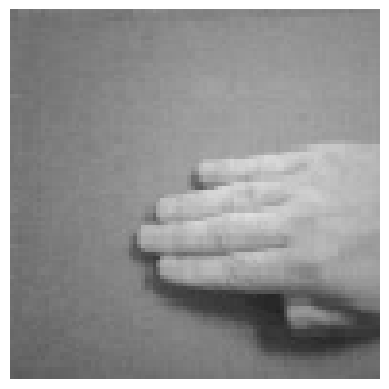

(96, 96, 3)

In [ ]:
image = images[0]

plt.figure()
plt.imshow(image)
plt.axis("off")
plt.show()

image.shape

In [ ]:
resized_image = tf.image.resize(tf.convert_to_tensor([image]), size=(image_size, image_size))

patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

Image size: 96 X 96
Patch size: 6 X 6
Patches per image: 256
Elements per patch: 108


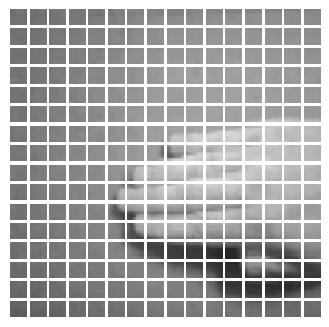

In [ ]:
n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy())
    plt.axis("off")

In [ ]:
class PatchEncoder(tf.keras.layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = tf.keras.layers.Dense(units=projection_dim)
        self.position_embedding = tf.keras.layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

#**Model**

In [ ]:
inputs = tf.keras.layers.Input(shape=input_shape)
# Data augmentation
augmented = data_augmentation(inputs)
# Create patches.
patches = Patches(patch_size)(augmented)
# Encode
encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

for _ in range(transformer_layers):
  # Layer normalization 1
  x1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
  # Create a multi-head attention layer.
  attention_output = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=projection_dim, dropout=0.1)(x1, x1)
  # Skip connection 1.
  x2 = tf.keras.layers.Add()([attention_output, encoded_patches])
  # Layer normalization 2.
  x3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(x2)
  # MLP.
  x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
  # Skip connection 2.
  encoded_patches = tf.keras.layers.Add()([x3, x2])

representation = tf.keras.layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
representation = tf.keras.layers.Flatten()(representation)
representation = tf.keras.layers.Dropout(0.5)(representation)
# Add MLP.
features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
# Classify outputs.
logits = tf.keras.layers.Dense(num_classes, activation='softmax')(features)
#logits = tf.keras.layers.Dense(num_classes)(features)


# Create the Keras model.
model = tf.keras.Model(inputs=inputs, outputs=logits)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 data_augmentation (Sequential)  (None, 96, 96, 3)   7           ['input_2[0][0]']                
                                                                                                  
 patches_2 (Patches)            (None, None, 108)    0           ['data_augmentation[1][0]']      
                                                                                                  
 patch_encoder_1 (PatchEncoder)  (None, 256, 64)     23360       ['patches_2[0][0]']              
                                                                                              

In [ ]:
optimizer = tfa.optimizers.AdamW(learning_rate=learning_rate, weight_decay=weight_decay)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
                       tf.keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy")])

checkpoint_filepath = "/content/"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath,
                                                      monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=3)

In [ ]:
history = model.fit(train_generator,
                    batch_size=batch_size,
                    epochs=30,
                    validation_data=validation_generator,
                    callbacks=[checkpoint_callback, ear])


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


In [ ]:
model.load_weights(checkpoint_filepath)